# CPU Fan Speed Controller

In [13]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

## Inputs

In [14]:
temp = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
clock = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'cpu clock')
power = ctrl.Antecedent(np.arange(0, 4, 1), 'power profile')

In [15]:
temp['cold'] = fuzzy.trapmf(temp.universe, [0, 0, 25, 50])
temp['warm'] = fuzzy.trimf(temp.universe, [20, 50, 80])
temp['hot'] = fuzzy.trapmf(temp.universe, [50, 80, 100, 100])
clock['slow'] = fuzzy.trapmf(clock.universe, [0, 0, 0.8, 2])
clock['normal'] = fuzzy.trimf(clock.universe, [0.5, 2, 3.5])
clock['turbo'] = fuzzy.trapmf(clock.universe, [2, 3.5, 4, 4])
power['saver'] = fuzzy.trimf(power.universe, [0,1,2])
power['performance'] = fuzzy.trimf(power.universe, [1, 2, 3])

/home/nimahsn/anaconda3/envs/fuzzy/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


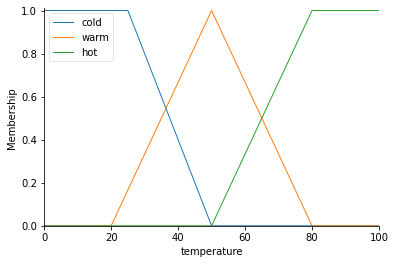

In [16]:
temp.view()

/home/nimahsn/anaconda3/envs/fuzzy/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


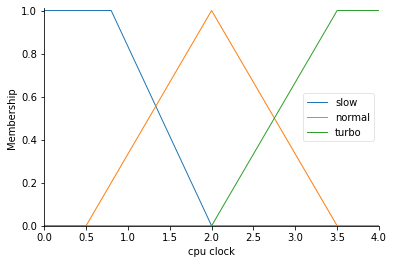

In [17]:
clock.view()

/home/nimahsn/anaconda3/envs/fuzzy/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


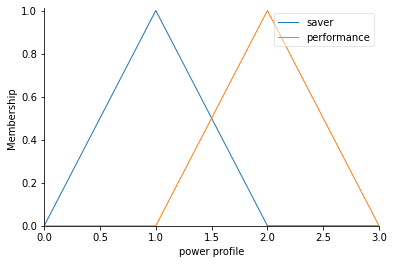

In [18]:
power.view()

## output

In [19]:
fan_speed = ctrl.Consequent(np.arange(0, 6001, 100), label='fan speed')

In [20]:
fan_speed['slow'] = fuzzy.gaussmf(fan_speed.universe, 0, 1200)
fan_speed['medium'] = fuzzy.gaussmf(fan_speed.universe, 3000, 800)
fan_speed['fast'] = fuzzy.gaussmf(fan_speed.universe, 6000, 1200)

/home/nimahsn/anaconda3/envs/fuzzy/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


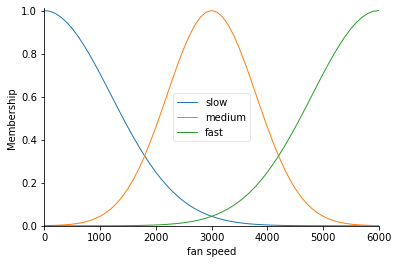

In [21]:
fan_speed.view()

## Rules

In [22]:
rules = []
rules.append(ctrl.Rule(temp['cold'] & clock ['slow'], fan_speed['slow']))
rules.append(ctrl.Rule(temp['cold'] & clock['normal'], fan_speed['slow']))
rules.append(ctrl.Rule(temp['cold'] & clock ['turbo'] & power['saver'], fan_speed['slow']))
rules.append(ctrl.Rule(temp['cold'] & clock ['turbo'] & power['performance'], fan_speed['medium']))
rules.append(ctrl.Rule(temp['warm'] & clock['slow'], fan_speed['slow']))
rules.append(ctrl.Rule(temp['warm'] & clock['normal'] & power['performance'], fan_speed['medium']))
rules.append(ctrl.Rule(temp['warm'] & clock['normal'] & power['saver'], fan_speed['slow']))
rules.append(ctrl.Rule(temp['warm'] & clock['turbo'] & power['saver'], fan_speed['medium']))
rules.append(ctrl.Rule(temp['warm'] & clock['turbo'] & power['performance'], fan_speed['fast']))
rules.append(ctrl.Rule(temp['hot'] & clock['slow'] & power['saver'], fan_speed['medium']))
rules.append(ctrl.Rule(temp['hot'] & clock['slow'] & power['performance'], fan_speed['fast']))
rules.append(ctrl.Rule(temp['hot'] & clock['normal'] & power['saver'], fan_speed['medium']))
rules.append(ctrl.Rule(temp['hot'] & clock['normal'] & power['performance'], fan_speed['fast']))
rules.append(ctrl.Rule(temp['hot'] & clock['turbo'], fan_speed['fast']))

controller = ctrl.ControlSystem(rules)

## Inference

In [23]:
speed = ctrl.ControlSystemSimulation(controller)
input_temp = 50
input_clock = 3
input_power = 1  # 1 for power saving and 2 for performance
speed.inputs({'temperature':int(input_temp), 'cpu clock':float(input_clock), 'power profile': int(input_power)})
speed.compute()
print(speed.output['fan speed'])

2514.105973677407


/home/nimahsn/anaconda3/envs/fuzzy/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


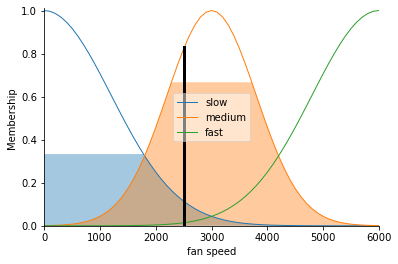

In [24]:
fan_speed.view(sim=speed)

## Plot

In [25]:
upsampled_temp = np.linspace(0, 101, 200)
upsampled_clock = np.linspace(0, 4.1, 80)
x, y = np.meshgrid(upsampled_temp, upsampled_clock)
z = np.zeros_like(x)

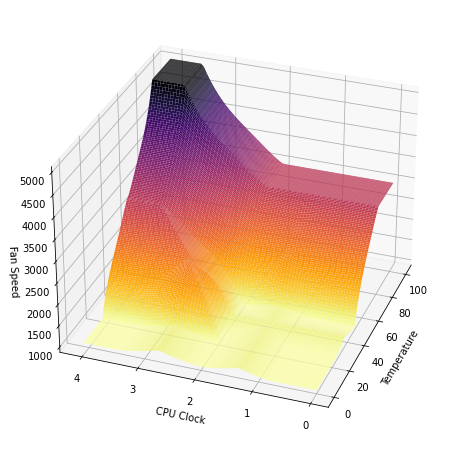

In [26]:
for i in range(80):
    for j in range(200):
        speed.input['temperature'] = x[i, j]
        speed.input['cpu clock'] = y[i, j]
        speed.input['power profile'] = 1
        speed.compute()
        z[i, j] = speed.output['fan speed']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='inferno_r',
                       linewidth=0.4, antialiased=True)

ax.view_init(30, 200)
ax.set_xlabel('Temperature')
ax.set_ylabel('CPU Clock')
ax.set_zlabel('Fan Speed')
plt.savefig("a.png", dpi=1000)

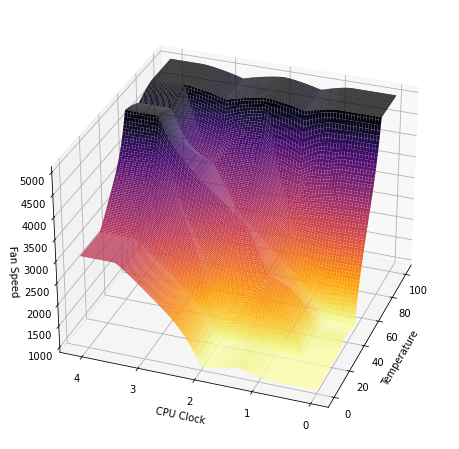

In [27]:
for i in range(80):
    for j in range(200):
        speed.input['temperature'] = x[i, j]
        speed.input['cpu clock'] = y[i, j]
        speed.input['power profile'] = 2
        speed.compute()
        z[i, j] = speed.output['fan speed']

# Plot the result in pretty 3D with alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='inferno_r',
                       linewidth=0.4, antialiased=True)

ax.view_init(30, 200)
ax.set_xlabel('Temperature')
ax.set_ylabel('CPU Clock')
ax.set_zlabel('Fan Speed')
plt.savefig("b.png", dpi=1000)